In [2]:
import numpy as np

#from scipy import linalg
import matplotlib.cm as cm
import matplotlib.pyplot as plt
#import sympy as sym
import math

## Implementacion de los metodos

A continuacion se implementan los metodos de descenso gradiente siguientes:

1. Descenso maximo naive
2. Busqueda en linea Backtracking
3. Naive con direccion de descenso aleatoria
4. Direccion de Newton con Hessiana exacta
5. Direccion de Newton con Hessiana aproximada (via BFGS)

In [3]:
# f es la funcion
# df es la derivada 
# x es el punto de diseno actual
# d es una direccion de descenso 
# alpha es el tamano maximo de paso
# p es el factor de reduccion
# beta es parametro de la primera condicion de wolfe

def backtracking_linesearch(f,df,x,d,paso=1,p=0.5,beta=1e-3):
    i=0
    # verficamos la condicion de aramijo o que se cumpla el maximo de las iteraciones
    while f(x+paso*d)>f(x)+beta*paso*np.dot(df(x).T,d):
        # nos retraemos en la direccion de descenso por un factor de p
        paso*=p
        # sumamos uno a nuestro contador
        i+=1
    return paso
    

### Naive Steepest Descent

In [4]:
def naive_steepest_descent(f,df,xo,paso,maxiter=1000,tolerancia=1e-6,criterio="EAI"):
    # hacemos el punto inicial un array para poder operar
    x=np.array(xo)
    # definimos una variable para el x optimo y la inicializamos con cero
    bestx = 0
    # hacemos una lista para las iteraciones para los graficos 
    listadoiteraciones=[]
    # agregamos a esta lista la primera iteracion i.e. el punto inicial
    listadoiteraciones.append(x)
    # creamos una lista donde van las imagenes de las iteraciones bajo f
    listadoimagenes=[]
    # agregamos a la lista anterior, la imagen del paso inicial
    listadoimagenes.append(f(x))
    # creamos una lista para los errores
    listadoerror=[]
    # creamos una variable que va a contar la cantidad de iteraciones necesitadas por la funcion
    iteraciones = 0
    # definimos la direccion de descenso como el negativo de la derivada 
    d = -(df(x))
    # definimos un booleano que va a indicar si hubo o no convergencia
    convergencia = False
    
    # iniciamos el ciclo
    for i in range(0,maxiter):
        # nos movemos en la direccion del gradiente en un paso de tamano "paso"
        x = x + paso*d
        # agregamos la iteracion al listado de iteraciones
        listadoiteraciones.append(x)
        # agregamos la imagen de la nueva iteracion al listado de imagenes
        listadoimagenes.append(f(x))
        # recalculamos la direccion i.e. calculamos la derivada de f en la nueva iteracion
        d = -(df(x))
        
        # esta porcion del codigo determina los criterios de paro
        #error relativo de la funcion
        
        if criterio == "ERF":
            # medimos la distancia entre las imagenes de dos iteraciones consecutivas
            error = np.abs(listadoimagenes[i+1]-listadoimagenes[i])
            # agregamos el error a la lista de errores
            listadoerror.append(error)
            # si el error es menor a la tolerancia, definimos esta iteracion como la mejor aproximacion
            if error<tolerancia:
                # asginamos esta iteracion como la mejor aproximacion
                bestx = x
                # terminamos el ciclo 
                break
                
        # error absoluto de iteraciones 
            
        if criterio == "EAI":
            # calculamos la distancia entre dos iteraciones consecutivas 
            error = np.linalg.norm(listadoiteraciones[i+1]-listadoiteraciones[i])
            # agregamos el error al listado de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la ultima iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia en el metodo
                convergencia = True
                # terminamos el ciclo
                break
                    
            # error relativo iteraciones
            
        if criterio == "ERI":
            # calculamos el error relativo entre dos iteraciones consecutivas
            # distancia entre iteraciones consecutivas dividido la norma de la iteracion previa
            error = np.linalg.norm(listadoiteraciones[i+1]-listadoiteraciones[i])/np.linalg.norm(listadoiteraciones[i])
            # agregamos el error al listado de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la ultima iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
            
        # norma del gradiente
            
        if criterio == "NG":
            # calculamos la norma del gradiente de la iteracion actual
            error = np.linalg.norm(df(listadoiteraciones[i+1]))
            # agregamos el error a la lista de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la iteracion actual como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
                
        # sumamos uno a la cantidad de iteraciones 
        iteraciones += 1
        
    # retornamos la aproximacion, la secuencia de iteraciones, la secuencia de imagenes, la secuencia de errores, 
    # la cantidad de iteraciones y si hubo o no convergencia
    
    return bestx, listadoiteraciones, listadoimagenes, listadoerror, iteraciones, convergencia

### Backtracking 

In [5]:
def descenso_gradiente_backtracking(f,df,xo,paso,maxiter=1000,tolerancia=1e-6,criterio="EAI"):
    # hacemos la primera iteracion un array
    x = np.array(xo)
    # creamos una lista donde van las iteraciones
    listadoiteraciones = []
    # creamos una lista donde van las imagenes de las iteraciones
    listadoimagenes = []
    # creamos una lista de errores
    listadoerror = []
    # agregamos a la lista de iteraciones el punto x
    listadoiteraciones.append(x)
    # agregamos a la lista de imagenes el punto x
    listadoimagenes.append(f(x))
    # creamos una variable para contabilizar las iteraciones
    iteraciones = 0
    # definimos la direccion de descenso como el negativo de la derivada 
    d = -(df(x))
    # definimos la mejor aproximacion
    bestx = 0
    # creamos un booleano que indica si hubo convergencia o no
    convergencia = False
    
    # iniciamos el ciclo de iteraciones
    
    for i in range(0,maxiter):
        # realizamos el backtracking
        paso = backtracking_linesearch(f,df,x,d,paso,0.5,1e-3)
        # nos movemos en la direccion de descenso un paso de tamano paso determinado por el backtracking
        x = x + paso*d 
        # agregamos esta iteracion al listado de iteraciones
        listadoiteraciones.append(x)
        # agregamos la imagen de esta iteracion bajo f al listado de imagenes
        listadoimagenes.append(f(x))
        # recalculamos la direccion de descenso i.e. calculamos la derivada valuada en la nueva iteracion
        d = -(df(x))
        # sumamos en 1 la cantidad de iteraciones
        iteraciones +=1
        
        # la siguiente porcion del codigo son los criterios de paro
        
        # error relativo imagenes
        if criterio == "ERF":
            # medimos la distancia entre las imagenes de dos iteraciones consecutivas
            error = np.abs(listadoimagenes[i+1]-listadoimagenes[i])
            # agregamos el error a la lista de errores
            listadoerror.append(error)
            # si el error es menor a la tolerancia, definimos esta iteracion como la mejor aproximacion
            if error<tolerancia:
                # asginamos esta iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo 
                break
                
        # error absoluto de iteraciones 
            
        if criterio == "EAI":
            # calculamos la distancia entre dos iteraciones consecutivas 
            error = np.linalg.norm(listadoiteraciones[i+1]-listadoiteraciones[i])
            # agregamos el error al listado de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la ultima iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
                    
            # error relativo iteraciones
            
        if criterio == "ERI":
            # calculamos el error relativo entre dos iteraciones consecutivas
            # distancia entre iteraciones consecutivas dividido la norma de la iteracion previa
            error = np.linalg.norm(listadoiteraciones[i+1]-listadoiteraciones[i])/np.linalg.norm(listadoiteraciones[i])
            # agregamos el error al listado de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la ultima iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
            
        # norma del gradiente
            
        if criterio == "NG":
            # calculamos la norma del gradiente de la iteracion actual
            error = np.linalg.norm(df(listadoiteraciones[i+1]))
            # agregamos el error a la lista de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la iteracion actual como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
                
    # retornamos la aproximacion, la secuencia de iteraciones, la secuencia de imagenes, la secuencia de errores, 
    # la cantidad de iteraciones y si hubo o no convergencia 
    
    return bestx, listadoiteraciones, listadoimagenes, listadoerror, iteraciones, convergencia
    
        
        
    
    

### Random steepest descent

Empezamos definiendo una funcion capaz de devolver un vector que se encuentre

In [6]:
def new_vect(df, x, n):  #df el gradiente, x el punto donde se esta evaluando, n la dimension de los vectores
    
    vect = np.random.normal(0,1,(n,1)) #Generar un vector

    vect = vect/np.linalg.norm(vect) #normalizarlo

    grad = df(x)/np.linalg.norm(df(x)) #normalizar
    
    
    
    while( not (np.matmul(grad.T, vect) < 0) ):
        
        vect = np.random.normal(0,1,(n,1)) #Generar un vector

        vect = vect/np.linalg.norm(vect) #normalizarlo

        grad = df(x)/np.linalg.norm(df(x)) #normalizar

            
    return vect

In [7]:
def random_steepest_descent(f,df,xo,paso,maxiter=1000,tolerancia=1e-6,criterio="EAI"):
    # hacemos el punto inicial un array 
    x = np.array(xo)
    # inicializamos la variable de la mejor aproximacion como cero
    bestx = 0
    # creamos un lista de iteraciones
    listadoiteraciones = []
    # agregamos a la lista de iteraciones el paso inicial
    listadoiteraciones.append(x)
    # creamos una lista de imagenes de las iteraciones bajo f
    listadoimagenes = []
    # agregamos a la lista la imagen de la primera iteracion 
    listadoimagenes.append(f(x))
    # creamos una lista para los errores
    listadoerror = []
    # creamos una variable para contabilizar la cantidad de iteraciones
    iteraciones = 0
    # creamos un booleano para determinar cuando terminar el ciclo
    convergencia = False
       
    
    
    
    # iniciamos el ciclo 
    for i in range(0,maxiter):
        
        
        #generar un vector d tal que el angulo entre d y -df(x) este entre -pi/2 y pi/
        
        d = new_vect(df, x, len(df(x)))

        # nos movemos en la direccion de descenso 
        x = x + paso*d
        
        # agregramos la iteracion a la lista de iteraciones
        listadoiteraciones.append(x)
        # agregamos la imagen de la iteracion a la lista de imagenes
        listadoimagenes.append(f(x))
        iteraciones +=1

        
        # verificamos las condiciones de paro
        
        # error relativo imagenes
        
        if criterio == "ERF":
            # medimos la distancia entre las imagenes de dos iteraciones consecutivas
            error = np.abs(listadoimagenes[i+1]-listadoimagenes[i])
            # agregamos el error a la lista de errores
            listadoerror.append(error)
            # si el error es menor a la tolerancia, definimos esta iteracion como la mejor aproximacion
            if error<tolerancia:
                # asginamos esta iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo 
                break
                
        # error absoluto de iteraciones 
            
        if criterio == "EAI":
            # calculamos la distancia entre dos iteraciones consecutivas 
            error = np.linalg.norm(listadoiteraciones[i+1]-listadoiteraciones[i])
            # agregamos el error al listado de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la ultima iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
        
        # error relativo iteraciones
        
        if criterio == "ERI":
            # calculamos el error relativo entre dos iteraciones consecutivas
            # distancia entre iteraciones consecutivas dividido la norma de la iteracion previa
            error = np.linalg.norm(listadoiteraciones[i+1]-listadoiteraciones[i])/np.linalg.norm(listadoiteraciones[i])
            # agregamos el error al listado de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la ultima iteracion como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
            
        # norma del gradiente
            
        if criterio == "NG":
            # calculamos la norma del gradiente de la iteracion actual
            error = np.linalg.norm(df(listadoiteraciones[i+1]))
            # agregamos el error a la lista de errores
            listadoerror.append(error)
            # verificamos que el error sea menor a la tolerancia
            if error<tolerancia:
                # asignamos la iteracion actual como la mejor aproximacion
                bestx = x
                # determinamos que hubo convergencia
                convergencia = True
                # terminamos el ciclo
                break
                
    # retornamos la aproximacion, la secuencia de iteraciones, la secuencia de imagenes, la secuencia de errores, 
    # la cantidad de iteraciones y si hubo o no convergencia 
    
    return bestx, listadoiteraciones, listadoimagenes, listadoerror, iteraciones, convergencia

### Descenso gradiante con direccion de Newton - Hessiana Exacta

#### Implementacion

In [8]:
def Gradiente_Hessiana_exacta(f, grad, Hess, x, alpha=1, max_iter = 500, tolerancia = 0.1, criterio_paro = 'NG'):
    
    #Metricas de evaluacion de rendimiento
    
    iters = 0
    x_iter = []
    f_iter = []
    errores = []
    
    converge = False
    
    
    
    #notese que hay varios casos de ejecucion del ciclo while debido a los distintos criterios de paro implementados
    
    #Criterios de paro: norma_gradiente, abs_err_x, abs_err_f(x), rel_err_x, rel_err_f(x)
    
    if criterio_paro == 'NG':
        
        while(np.linalg.norm(grad(x)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(Hess(x)),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
        
        if np.linalg.norm(grad(x)) <= tolerancia:
            converge = True
        else:
            converge = False
        
    elif (criterio_paro == 'EAI'):
        
        p = np.matmul(-np.linalg.inv(Hess(x)),grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(x-x_k) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(Hess(x)), grad(x))
        
            x_k = x
            x = x + alpha*p
        
            
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
        
        if np.linalg.norm(x-x_k) <= tolerancia:
            converge = True
        else:
            converge = False
        
    elif (criterio_paro == 'ERI'):
        
        p = np.matmul(-np.linalg.inv(Hess(x)),grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(x-x_k)/np.linalg.norm(x_k) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(Hess(x)), grad(x))
        
            x_k = x
            x = x + alpha*p
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
              
        if np.linalg.norm(x-x_k)/np.linalg.norm(x_k) <= tolerancia:
            converge = True
        else:
            converge = False
    
    elif (criterio_paro == 'EAF'):
        
        p = np.matmul(-np.linalg.inv(Hess(x)), grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(f(x)-f(x_k)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(Hess(x)),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
    
        if np.linalg.norm(f(x)-f(x_k)) <= tolerancia:
            converge = True
        else:
            converge = False
    
    elif (criterio_paro == 'ERF'):
        
        p = np.matmul(-np.linalg.inv(Hess(x)), grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(f(x)-f(x_k))/np.linalg.norm(f(x_k)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(Hess(x)),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
            
        if np.linalg.norm(f(x)-f(x_k))/np.linalg.norm(f(x_k)) <= tolerancia:
            converge = True
        else:
            converge = False
    else:
        print('El criterio de paro especificado no esta implementado.')
        print('Los criterios implementados son: "norma_gradiente", "abs_err_x", "abs_err_f(x)", "rel_err_x", "rel_err_f(x)"')
        
    
    return x, x_iter, f_iter, errores, iters, converge

### Descenso gradiante con direccion de Newton - Hessiana aproximada via BFGS

#### Implementacion del algoritmo

In [9]:
def Gradiente_BFGS(f, grad, x, alpha=1, max_iter = 500, tolerancia = 0.1, criterio_paro = 'NG'):
    
    #Metricas de evaluacion de rendimiento
    
    iters = 0
    x_iter = []
    f_iter = []
    errores = []
    
    converge = False
    
    #Inicializamos B_0 la primera estimacion de la Hessiana: matriz identidad
    
    B = np.identity(len(x))
    
    
    #notese que hay varios casos de ejecucion del ciclo while debido a los distintos criterios de paro implementados
    
    #Criterios de paro: norma_gradiente, abs_err_x, abs_err_f(x), rel_err_x, rel_err_f(x)
    
    if criterio_paro == 'NG':
        
        while(np.linalg.norm(grad(x)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
        
        if np.linalg.norm(grad(x)) <= tolerancia:
            converge = True
        else:
            converge = False
        
    elif (criterio_paro == 'EAI'):
        
        p = np.matmul(-np.linalg.inv(B),grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(x-x_k) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B), grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
        
        if np.linalg.norm(x-x_k) <= tolerancia:
            converge = True
        else:
            converge = False
        
    elif (criterio_paro == 'ERI'):
        
        p = np.matmul(-np.linalg.inv(B),grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(x-x_k)/np.linalg.norm(x_k) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B), grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
              
        if np.linalg.norm(x-x_k)/np.linalg.norm(x_k) <= tolerancia:
            converge = True
        else:
            converge = False
    
    elif (criterio_paro == 'EAF'):
        
        p = np.matmul(-np.linalg.inv(B), grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(f(x)-f(x_k)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
    
        if np.linalg.norm(f(x)-f(x_k)) <= tolerancia:
            converge = True
        else:
            converge = False
    
    elif (criterio_paro == 'ERF'):
        
        p = np.matmul(-np.linalg.inv(B), grad(x))
        
        x_k = x
        x = x + alpha*p
        
        while(np.linalg.norm(f(x)-f(x_k))/np.linalg.norm(f(x_k)) > tolerancia and iters <= max_iter ):
        
            p = np.matmul(-np.linalg.inv(B),grad(x))
        
            x_k = x
            x = x + alpha*p
        
            s = x - x_k
            y = grad(x) - grad(x_k)
        
            term_1 = np.matmul(B, np.matmul(s, np.matmul(s.T, B.T)))
            term_2 = np.matmul(s.T, np.matmul(B, s))[0][0]
            term_3 = np.matmul(y,y.T)
            term_4 = np.matmul(y.T, s)[0][0]
        
        
            B = B - term_1/term_2 + term_3/term_4
        
            #info iteracion
        
            x_iter.append(x)
            f_iter.append(f(x))
            errores.append(np.linalg.norm(grad(x)))
            iters += 1
            
        if np.linalg.norm(f(x)-f(x_k))/np.linalg.norm(f(x_k)) <= tolerancia:
            converge = True
        else:
            converge = False
    else:
        print('El criterio de paro especificado no esta implementado.')
        print('Los criterios implementados son: "norma_gradiente", "abs_err_x", "abs_err_f(x)", "rel_err_x", "rel_err_f(x)"')
        
    
    return x, x_iter, f_iter, errores, iters, converge

## Aplicacion de los algoritmos implementados a las funciones de Rosenbrock, Wood y Rosenbrock para el caso 100 dimensional

### Funcion de Rosenbrock 2-dimensional:

In [510]:
def Rosenbrock(x):  #Definicion de la funcion de Rosenbrock
    return 100*(x[1][0]-x[0][0]**2)**2 +(1-x[0][0])**2

def Grad_Rosenbrock(x):  #Definicion del gradiente de la funcionde Rosenbrock
    
    comp1 = [-400*x[0][0]*(x[1][0]-x[0][0]**2) - 2*(1-x[0][0])]
    
    comp2 = [200*(x[1][0] - x[0][0]**2)]
    
    return np.array([comp1, comp2])


def Hess_Rosenbrock(x):  #La Hessiana de la fucion de Rosenbrock
    
    fila_1 = [1200*x[0][0]**2 - 400*x[1][0] + 2, -400*x[0][0]]
    fila_2 = [-400*x[0][0], 200]
    
    H = np.array([fila_1, fila_2])
    
    return H


#### Naive Steepest descent 

Aplicamos el metodo del naive steepest descent a la funcion de Rosenbrock de 2 dimensiones

In [512]:
#Inicializacion de los parametros:

f = Rosenbrock
grad = Grad_Rosenbrock
xo = np.array([[-1.2], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 100000
tolerancia = 0.001 
criterio_paro = 'NG'

In [513]:
x, xiteraciones, imagenes, errores_NSD, iters, converge = naive_steepest_descent(f,grad,xo,
                                                                             alpha,max_iter,
                                                                             tolerancia,criterio_paro)

In [514]:
x, iters, converge

(array([[0.99888303],
        [0.99776284]]),
 14788,
 True)

Notas:
1. Al variar el criterio de paro hay una reduccion del No. de iteraciones, pero se acompaña de una reduccion en la precisión.
2. la norma que mejores resultados produce, aunque con un cantidad substanciosa de iteraciones es NG

#### Descenso gradiente con backtracking

Aplicamos el algoritmo de decenso gradiente con backtracking a la funcion de Rosenbrock 2 dimensional.

In [515]:
#Inicializacion de los parametros:

f = Rosenbrock
grad = Grad_Rosenbrock
xo = np.array([[-1.2], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 100000
tolerancia = 0.001 
criterio_paro = 'NG'

In [516]:
x, xiteraciones, imagenes, errores_Btrk, iters, converge = descenso_gradiente_backtracking(f,grad,xo,
                                                                             alpha,max_iter,
                                                                             tolerancia,criterio_paro)

In [517]:
x, iters, converge

(array([[0.99888303],
        [0.99776284]]),
 14789,
 True)

Notas: 
1. Parametros identicos al caso anterior observaciones identicas.

#### Random Naive Steepest Descent

Aplicamos a la funcion de Rosenbrock 2 dimensional, el algoritmo de Naive steepest descent

In [518]:
#Inicializacion de los parametros:

f = Rosenbrock
grad = Grad_Rosenbrock
xo = np.array([[-1.2], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 50000
tolerancia = 0.001 
criterio_paro = 'NG'

In [519]:
x, xiteraciones, imagenes, errores_rdm, iters, converge = random_steepest_descent(f,grad,xo,
                                                                             alpha,max_iter,
                                                                             tolerancia,criterio_paro)

In [520]:
x, iters, converge

(array([[1.00101512],
        [1.00203622]]),
 15711,
 True)

#### Newton con Hessiana Exacta

Ahora el metodo de Newton con Hessiana exacta sobre Rosenbrock 2 dimensional

In [521]:
# incializando parametros para Rosenbrock con Hess exacta


f = Rosenbrock
grad = Grad_Rosenbrock
Hess = Hess_Rosenbrock
xo = np.array([[-1.2], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 1
max_iter = 50000
tolerancia = 0.001 
criterio_paro = 'NG'

In [522]:
x, x_iter, f_iter, errores_hess, iters, converge = Gradiente_Hessiana_exacta(f, grad, Hess,
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [523]:
x, iters, converge

(array([[0.9999957 ],
        [0.99999139]]),
 5,
 True)

Notas:

1. Resultados substancialmente mejores al todas las pruebas anteriores.
2. A penas 14 iteraciones para converger con $\alpha = 0.99$ y norma gradiente. 
3. Se puede reducir hasta 11 iteraciones con criterio de paro 'EAF'.

#### Newton con Hessiana aproximada

Siempre sobre la funcion de Rosenbrock 2D aplicamos el metodo de Newton con Hessiana aproximada.

In [533]:
# incializando parametros para Rosenbrock con Hess aprocimado por BFGS


f = Rosenbrock
grad = Grad_Rosenbrock
xo = np.array([[-1.2], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.99
max_iter = 50000
tolerancia = 0.001 
criterio_paro = 'NG' 

In [534]:
x, x_iter, f_iter, errores_aprx, iters, converge = Gradiente_BFGS(f, grad, 
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [535]:
x, iters, converge

(array([[1.00001201],
        [1.00002232]]),
 36,
 True)

Notas:

1. Mas iteraciones que con la Hessiana exacata
2. El unico criterio de paro que funciona es 'NG'
3. La precision es muy buena
4. Computacionalmente, menos demandante que con la Hessiana exacta.


<Figure size 432x288 with 0 Axes>

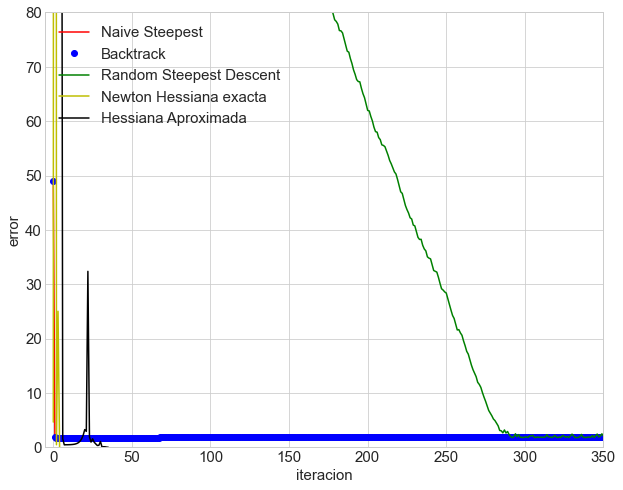

In [587]:
#Graficar la evolución de los errores de cada uno de los metodos sobre Rosenbrock 2D
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig = plt.figure(figsize =(10, 8))

ax = plt.axes()
plt.ylim([0, 80])
plt.xlim([-5, 350])

plt.plot(range(len(errores_NSD)), errores_NSD, '-r', label = 'Naive Steepest')
plt.plot(range(len(errores_Btrk)), errores_Btrk, 'ob', label = 'Backtrack')
plt.plot(range(len(errores_rdm)), errores_rdm, '-g', label = 'Random Steepest Descent')
plt.plot(range(len(errores_hess)), errores_hess, 'y', label = 'Newton Hessiana exacta')
plt.plot(range(len(errores_aprx)), errores_aprx, 'black', label = 'Hessiana Aproximada')

leg = ax.legend()

plt.ylabel('error')
plt.xlabel('iteracion')
plt.rcParams.update({'font.size': 15})

<Figure size 432x288 with 0 Axes>

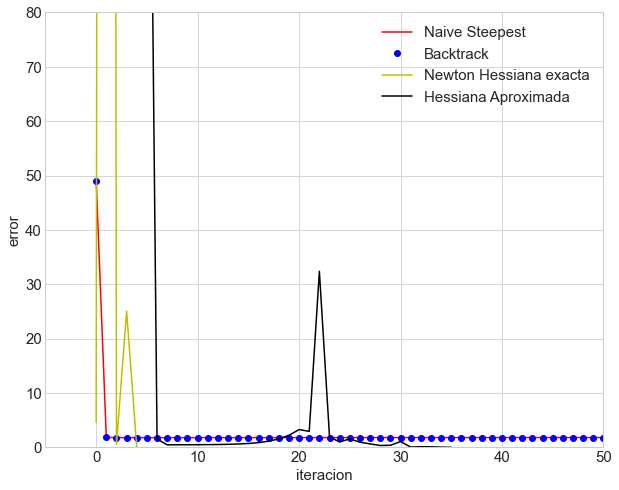

In [588]:
#Graficar la evolución de los errores de cada uno de los metodos sobre Rosenbrock 2D, esta vez nos enfocamos en los metodos 1,2, 4, 5
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig = plt.figure(figsize =(10, 8))

ax = plt.axes()
plt.ylim([0, 80])
plt.xlim([-5, 50])

plt.plot(range(len(errores_NSD)), errores_NSD, '-r', label = 'Naive Steepest')
plt.plot(range(len(errores_Btrk)), errores_Btrk, 'ob', label = 'Backtrack')

plt.plot(range(len(errores_hess)), errores_hess, 'y', label = 'Newton Hessiana exacta')
plt.plot(range(len(errores_aprx)), errores_aprx, 'black', label = 'Hessiana Aproximada')

leg = ax.legend()

plt.ylabel('error')
plt.xlabel('iteracion')
plt.rcParams.update({'font.size': 15})

### Funcion de WOOD

In [589]:
def Wood(x):  #Funcion de Wood
    return 100*(x[0][0]**2 - x[1][0])**2 + (x[0][0] -1)**2 + (x[2][0]-1)**2 + 90*(x[2][0]**2 - x[3][0])**2

def Grad_Wood(x):  #Gradiente de la funcion de Wood
    
    comp1 = [400*x[0][0] *(x[0][0]**2 - x[1][0]) + 2*(x[0][0] -1)]
    
    comp2 = [200*(x[1][0] - x[0][0]**2)]
    
    comp3 =  [360*x[2][0] *(x[2][0]**2 - x[3][0]) + 2*(x[2][0] -1)]
    
    comp4 = [180*(x[3][0] - x[2][0]**2)]
    
    return np.array([comp1, comp2, comp3, comp4])

def Hess_Wood(x):  #Definicion de la Hessiana de la funcion de Wood
    
    fila_1 = [1200*x[0][0]**2 - 400*x[1][0] + 2,    -400*x[0][0],        0,          0]
    fila_2 = [-400*x[0][0],                         200,                 0,          0]
    fila_3 = [0,        0,               1080*x[2][0]**2 - 360*x[3][0] + 2,      -360*x[2][0]]
    fila_4 = [0,        0,                                    -360*x[2][0],                               180]
    
    H = np.array([fila_1, fila_2, fila_3, fila_4])
    
    return H
    



#### Naive Steepest Descent

Aplicamos Naive Steepest Descent a la funcion de Wood

In [590]:
#Inicializacion de los parametros:

f = Wood
grad = Grad_Wood
xo = np.array([[-3], [1], [-3], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.0006
max_iter = 50000
tolerancia = 0.001
criterio_paro = 'NG'

In [591]:
x, xiteraciones, imagenes, errores_NSD, iters, converge = naive_steepest_descent(f,grad,xo,
                                                                             alpha,max_iter,
                                                                             tolerancia,criterio_paro)

In [592]:
x, iters, converge

(array([[0.99929289],
        [0.99858344],
        [1.00086613],
        [1.00173685]]),
 27995,
 True)

Nota:
No se logró la convergencia del metodo con la funcion de WOOD. 
 mejor resultado se obtuvo con: ERI, alpha = 0.00099, tol = 0.015

#### Descenso gradiente con backtracking

Aplicamos el metodo de backtracking a la funcion de Wood

In [593]:
#Inicializacion de los parametros:

f = Wood
grad = Grad_Wood
xo = np.array([[-3], [1], [-3], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.1
max_iter = 50000
tolerancia = 0.001
criterio_paro = 'NG'

In [594]:
x, xiteraciones, imagenes, errores_Btrk, iters, converge = descenso_gradiente_backtracking(f,grad,xo,
                                                                             alpha,max_iter,
                                                                             tolerancia,criterio_paro)

In [595]:
x, iters, converge

(array([[1.00111537],
        [1.00223645],
        [1.00008975],
        [1.00017991]]),
 34433,
 True)

Notas:

1. No se logró el resultado esperado
2. el mejor resultado fue con EAI, alpha = 1, y tolerancia = 10

#### Random Steepest Descent

Aplicamos a la funcion de Wood, el algoritmo de Naive steepest descent

In [596]:
#Inicializacion de los parametros:

f = Wood
grad = Grad_Wood
xo = np.array([[-3], [1], [-3], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 1000000
tolerancia = 0.01 
criterio_paro = 'NG'

In [597]:
x, xiteraciones, imagenes, errores_rdm, iters, converge = random_steepest_descent(f,grad,xo,
                                                                             alpha,max_iter,
                                                                             tolerancia,criterio_paro)

In [598]:
x, iters, converge

(array([[0.99695991],
        [0.99392341],
        [1.00710438],
        [1.01429697]]),
 48642,
 True)

#### Newton con Hessiana Exacta: 

Aplicamos el metodo de Newton con Hessiana exacta a la funcion de Wood.


In [599]:
#Inicializacion de los parametros:

f = Wood
grad = Grad_Wood
Hess = Hess_Wood
xo = np.array([[-3], [1], [-3], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 50000
tolerancia = 0.01 
criterio_paro = 'NG'

In [600]:
x, xiteraciones, imagenes, errores_hess, iters, converge = Gradiente_Hessiana_exacta(f,grad,Hess, xo,
                                                                             alpha,max_iter,
                                                                             tolerancia,criterio_paro)

In [601]:
x, iters, converge

(array([[0.99397756],
        [0.98797868],
        [0.99469612],
        [0.98940837]]),
 14110,
 True)

#### Newton con Hessiana aproximada

Aplicamos el metodo de Newton con Hessiana aproximada via BFGS a la funcion de Wood

In [602]:
#Inicializar los parametros para Wood aplicando Newton via Hess aproximada

f = Wood
grad = Grad_Wood
xo = np.array([[-3], [1], [-3], [1]])   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 100000
tolerancia = 0.001 
criterio_paro = 'NG'

In [603]:
#Lanzando la busqueda mediante descenso gradiente con direccion de Newton, Hessiano aproximado via BFGS

x, x_iter, f_iter, errores_aprx, iters, converge = Gradiente_BFGS(f, grad, 
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [604]:
x, iters, converge

(array([[0.99998792],
        [0.99997593],
        [0.99964125],
        [0.99928337]]),
 24400,
 True)

<Figure size 432x288 with 0 Axes>

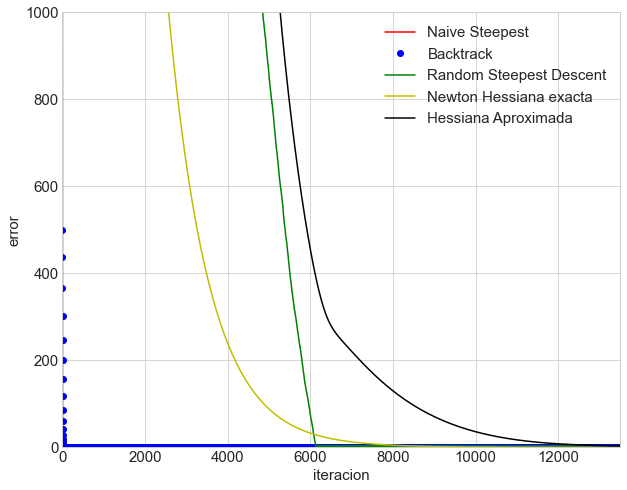

In [611]:
#Graficar la evolución de los errores de cada uno de los metodos sobre la funcion de Wood
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig = plt.figure(figsize =(10, 8))

ax = plt.axes()
plt.ylim([0, 1000])
plt.xlim([-5, 13500])

plt.plot(range(len(errores_NSD)), errores_NSD, '-r', label = 'Naive Steepest')
plt.plot(range(len(errores_Btrk)), errores_Btrk, 'ob', label = 'Backtrack')
plt.plot(range(len(errores_rdm)), errores_rdm, '-g', label = 'Random Steepest Descent')
plt.plot(range(len(errores_hess)), errores_hess, 'y', label = 'Newton Hessiana exacta')
plt.plot(range(len(errores_aprx)), errores_aprx, 'black', label = 'Hessiana Aproximada')

leg = ax.legend()

plt.ylabel('error')
plt.xlabel('iteracion')
plt.rcParams.update({'font.size': 15})

<Figure size 432x288 with 0 Axes>

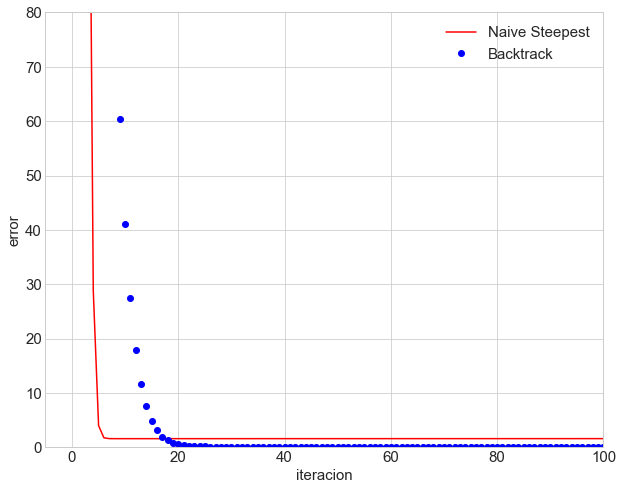

In [615]:
#Graficar la evolución de los errores de los metodos 1 y 2 sobre la funcion de Wood, 
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig = plt.figure(figsize =(10, 8))

ax = plt.axes()
plt.ylim([0, 80])
plt.xlim([-5, 100])

plt.plot(range(len(errores_NSD)), errores_NSD, '-r', label = 'Naive Steepest')
plt.plot(range(len(errores_Btrk)), errores_Btrk, 'ob', label = 'Backtrack')




leg = ax.legend()

plt.ylabel('error')
plt.xlabel('iteracion')
plt.rcParams.update({'font.size': 15})

### Rosenbrock - 100 dimensional

In [620]:
def Rosenbrock_100(X):  #Definimos la funcion de Rosenbrock en el casod 100 dimensional
    
    lista_vals = []
    
    for i in range(0,99):   #99 por el indice de python
        
        val = 100*(X[i+1][0] - X[i]**2)**2 + (1 - X[i][0])**2
        
        lista_vals.append(val)
        
    return np.sum(lista_vals)

In [621]:
def Grad_Rosenbrock_100(X):   #ahora el gradiente de la funcion de Rosembrock - 100
    
    comp_1 = [-400*X[0][0]*(X[1][0]- X[0][0]**2) - 2*(1-X[0][0])]
    
    componentes_i = []
    
    for i in range(1,99):
        
        nueva_comp = -400*X[i][0]*(X[i+1][0] - X[i][0]**2) + 200*(X[i][0] - X[i-1][0]**2 ) - 2*(1 - X[i][0])
        
        componentes_i.append([nueva_comp])
        
    comp_100 = [200*(X[99][0] - X[98][0]**2)]
    
    vector = [comp_1]
    
    for componente in componentes_i:
        
        vector.append(componente)
        
    vector.append(comp_100)
    
    return np.array(vector)

In [622]:
def Hess_Rosenbrock_100(X): #Definimos la Hessiana de Rosenbrock 100 dimesional
    
    #preparamos la fila 1
    fila_1 = [0 for i in range(0,100)]
    fila_1[0] =  1200 * X[0][0]**2 - 400*X[1][0] + 2
    fila_1[1] =  -400*X[0][0]
    
    #preparamos las filas intermedias
    filas_intermedias = []
    for i in range(1,99):
        
        fila = [0 for j in range(0,100)]
        
        fila_j = -400 *X[i-1][0]
        fila_k = 1200 * X[i][0]**2 - 400*X[i+1][0] + 202
        fila_l = -400 * X[i][0]
        
        fila[i-1] = fila_j
        fila[i] = fila_k
        fila[i+1] = fila_l
        
        filas_intermedias.append(fila)
        
    #la ultima fila 
    
    fila_100 = [0 for k in range(0,100)]
    
    fila_100[98] = - 400*X[98][0]
    fila_100[99] = 200
    
    filas = filas_intermedias
    
    filas.insert(0, fila_1)
    filas.insert(99, fila_100)
    
    return np.array(filas)
    

Empezamos por preparar el punto de inicio de la busqueda: $[-1.2, 1,1,1,..., -1.2, 1] \in \mathbb{R}^{100}$

In [623]:
#Construyendo el punto de inicio X_o: 

X_o = np.array([[1] for i in range(0,100)])

X_o[0], X_o[98] = np.array([-1.2]), np.array([-1.2])


#### Naive steepest descent

Aplicamos el metodo del Naive Steepest Descent a la funcion de Rosenbrock 100 dimensional.

In [624]:
#Inicializamos los parametros de la funcion


f = Rosenbrock_100
grad = Grad_Rosenbrock_100
xo = X_o   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 50000
tolerancia = 0.001 
criterio_paro = 'NG'


In [625]:
x, x_iter, f_iter, errores_NSD, iters, converge = naive_steepest_descent(f, grad,
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [626]:
x, iters, converge 

(array([[-0.9932861 ],
        [ 0.99665107],
        [ 0.99833032],
        [ 0.99916774],
        [ 0.9995852 ],
        [ 0.99979328],
        [ 0.99989698],
        [ 0.99994866],
        [ 0.99997441],
        [ 0.99998725],
        [ 0.99999365],
        [ 0.99999683],
        [ 0.99999842],
        [ 0.99999921],
        [ 0.99999961],
        [ 0.9999998 ],
        [ 0.9999999 ],
        [ 0.99999995],
        [ 0.99999998],
        [ 0.99999999],
        [ 0.99999999],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1

#### Descenso gradiente con backtracking

Aplicamos el metodo del descenso gradiente con backtrcking a la funcion de Rosenbrock 100 dimensional.

In [627]:
#Inicializamos los parametros de la funcion


f = Rosenbrock_100
grad = Grad_Rosenbrock_100
xo = X_o   #Punto de inicializacion de la busqueda del minimo
alpha= 0.1
max_iter = 50000
tolerancia = 0.001 
criterio_paro = 'NG'


In [628]:
x, x_iter, f_iter, errores_Btrk, iters, converge = descenso_gradiente_backtracking(f, grad,
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [629]:
x, iters, converge 

(array([[-0.9932861 ],
        [ 0.99665107],
        [ 0.99833032],
        [ 0.99916774],
        [ 0.9995852 ],
        [ 0.99979328],
        [ 0.99989698],
        [ 0.99994866],
        [ 0.99997441],
        [ 0.99998725],
        [ 0.99999365],
        [ 0.99999683],
        [ 0.99999842],
        [ 0.99999921],
        [ 0.99999961],
        [ 0.9999998 ],
        [ 0.9999999 ],
        [ 0.99999995],
        [ 0.99999998],
        [ 0.99999999],
        [ 0.99999999],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1

#### Random Steepest Descent

Aplicamos el metodo del random steepest descent a la funcion de Rosenbrock 100 dimensional.

In [630]:
#Inicializamos los parametros de la funcion


f = Rosenbrock_100
grad = Grad_Rosenbrock_100
xo = X_o   #Punto de inicializacion de la busqueda del minimo
alpha= 0.1
max_iter = 100000
tolerancia = 0.01 
criterio_paro = 'ERI'


In [631]:
x, x_iter, f_iter, errores_rdm, iters, converge = random_steepest_descent(f, grad,
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [632]:
x_iter[-1], iters, converge

(array([[-0.99648057],
        [ 0.99448357],
        [ 0.99037214],
        [ 0.97239505],
        [ 0.99478122],
        [ 0.98568295],
        [ 0.96693425],
        [ 0.99161967],
        [ 1.00439328],
        [ 0.99972176],
        [ 0.99340453],
        [ 1.01692558],
        [ 1.0026041 ],
        [ 1.01176212],
        [ 0.98500697],
        [ 1.0257777 ],
        [ 1.01423021],
        [ 1.01298599],
        [ 1.01662269],
        [ 0.99947943],
        [ 0.99324311],
        [ 0.99456039],
        [ 1.00417356],
        [ 0.99224633],
        [ 0.99112114],
        [ 1.00436532],
        [ 1.00867285],
        [ 0.96760794],
        [ 0.9722312 ],
        [ 0.99230221],
        [ 1.00288414],
        [ 0.99346986],
        [ 1.01286173],
        [ 0.99118661],
        [ 1.00100712],
        [ 1.01832554],
        [ 0.99121109],
        [ 0.99220581],
        [ 0.99314185],
        [ 1.0410317 ],
        [ 0.9941248 ],
        [ 1.00822601],
        [ 1.02046294],
        [ 0

#### Newton con Hessiana Exacta

Ahora procedemos con el metodo de Newton con Hessiana exacta sobre la funcion de Rosenbrock 100 dimensional

In [633]:
#Inicializamos los parametros de la funcion


f = Rosenbrock_100
grad = Grad_Rosenbrock_100
Hess = Hess_Rosenbrock_100
xo = X_o   #Punto de inicializacion de la busqueda del minimo
alpha= 0.01
max_iter = 50000
tolerancia = 0.001 
criterio_paro = 'NG'


In [634]:
x, x_iter, f_iter, errores_hess, iters, converge = Gradiente_Hessiana_exacta(f, grad, Hess,
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [635]:
x, iters, converge

(array([[-0.99328611],
        [ 0.99665108],
        [ 0.99833032],
        [ 0.99916774],
        [ 0.9995852 ],
        [ 0.99979328],
        [ 0.99989698],
        [ 0.99994866],
        [ 0.99997441],
        [ 0.99998725],
        [ 0.99999365],
        [ 0.99999683],
        [ 0.99999842],
        [ 0.99999921],
        [ 0.99999961],
        [ 0.9999998 ],
        [ 0.9999999 ],
        [ 0.99999995],
        [ 0.99999998],
        [ 0.99999999],
        [ 0.99999999],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1.        ],
        [ 1

#### Newton con Hessiana aproximada

Aplicamos el metodo de Newton con Hessiana aproximada via BFGS a la funcion de Rosenbrock para el caso 100 dimesional

In [636]:
#Parametros de la funcion

f = Rosenbrock_100
grad = Grad_Rosenbrock_100
xo = X_o   #Punto de inicializacion de la busqueda del minimo
alpha= 0.001
max_iter = 500000
tolerancia = 0.001 
criterio_paro = 'NG'

In [637]:
#Lanzando la busqueda mediante descenso gradiente con direccion de Newton, Hessiano aproximado via BFGS

x, x_iter, f_iter, errores_aprx, iters, converge = Gradiente_BFGS(f, grad, 
                                                             xo, alpha , max_iter , 
                                                             tolerancia, criterio_paro)

In [638]:
x, iters, converge

(array([[-0.9932861 ],
        [ 0.99665106],
        [ 0.99833031],
        [ 0.99916777],
        [ 0.9995853 ],
        [ 0.99979342],
        [ 0.99989714],
        [ 0.99994882],
        [ 0.99997456],
        [ 0.99998738],
        [ 0.99999377],
        [ 0.99999696],
        [ 0.99999853],
        [ 0.99999927],
        [ 0.99999962],
        [ 0.99999978],
        [ 0.99999985],
        [ 0.99999988],
        [ 0.99999988],
        [ 0.99999989],
        [ 0.99999991],
        [ 0.99999991],
        [ 0.99999992],
        [ 0.99999997],
        [ 1.00000003],
        [ 1.00000005],
        [ 1.00000004],
        [ 1.        ],
        [ 0.99999998],
        [ 0.99999996],
        [ 0.99999999],
        [ 1.00000004],
        [ 1.00000003],
        [ 0.99999999],
        [ 1.00000001],
        [ 1.00000005],
        [ 1.00000009],
        [ 1.00000008],
        [ 1.00000002],
        [ 0.99999992],
        [ 0.99999983],
        [ 0.99999984],
        [ 0.99999988],
        [ 0

<Figure size 432x288 with 0 Axes>

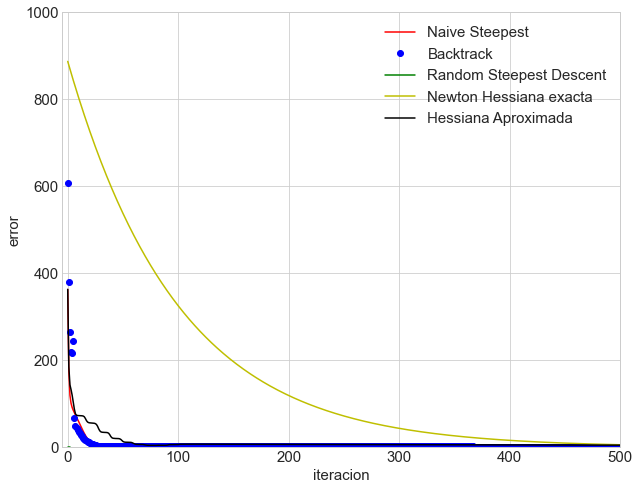

In [640]:
#Graficar la evolución de los errores de cada uno de los metodos sobre la funcion de Rosenborck - 100D 
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig = plt.figure(figsize =(10, 8))

ax = plt.axes()
plt.ylim([0, 1000])
plt.xlim([-5, 500])

plt.plot(range(len(errores_NSD)), errores_NSD, '-r', label = 'Naive Steepest')
plt.plot(range(len(errores_Btrk)), errores_Btrk, 'ob', label = 'Backtrack')
plt.plot(range(len(errores_rdm)), errores_rdm, '-g', label = 'Random Steepest Descent')
plt.plot(range(len(errores_hess)), errores_hess, 'y', label = 'Newton Hessiana exacta')
plt.plot(range(len(errores_aprx)), errores_aprx, 'black', label = 'Hessiana Aproximada')

leg = ax.legend()

plt.ylabel('error')
plt.xlabel('iteracion')
plt.rcParams.update({'font.size': 15})

<Figure size 432x288 with 0 Axes>

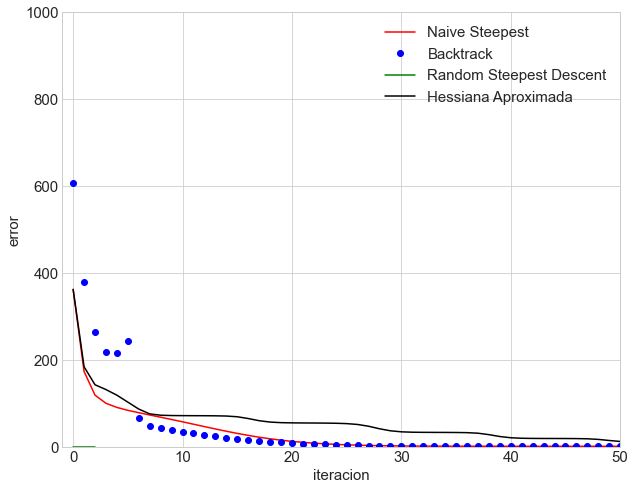

In [643]:
#Graficar la evolución de los errores de cada uno de los metodos sobre la funcion de Wood
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
fig = plt.figure(figsize =(10, 8))

ax = plt.axes()
plt.ylim([0, 1000])
plt.xlim([-1, 50])

plt.plot(range(len(errores_NSD)), errores_NSD, '-r', label = 'Naive Steepest')
plt.plot(range(len(errores_Btrk)), errores_Btrk, 'ob', label = 'Backtrack')
plt.plot(range(len(errores_rdm)), errores_rdm, '-g', label = 'Random Steepest Descent')
plt.plot(range(len(errores_aprx)), errores_aprx, 'black', label = 'Hessiana Aproximada')

leg = ax.legend()

plt.ylabel('error')
plt.xlabel('iteracion')
plt.rcParams.update({'font.size': 15})

## Investigación de los minimos de una Suma de Gaussianas

### Construccion y definicion de la funcion

### Definicion de vectores/puntos aleatorios sobre $[0,8]\times[0,8]$

In [481]:
#Inicializando los 8 puntos aleatorios sobre [0,8]x[0,8]

k = 8 #inicializar el No. de vectores

np.random.seed(110594)

vectores_rdm = [np.random.uniform(low=0, high=8, size=(2,1)) for i in range(0,k)]  

### NOTA: Tras correr esta celda es recomendable no cambiarla mientras se estén calculando los minimos de la funcion, 
### De lo contrario cambiarían en cada iteracion del algoritmo...


#### NOTA: 

Tras correr la celda anterior es recomendable no cambiarla o volver a correrla mientras se estén calculando los minimos de la funcion, 
de lo contrario cambiarían en cada iteracion del algoritmo...

### Definicion del parametro $\sigma$

Tambien se recomienda mantener constante este valor a lo largo del experimento, para no cambiar los resultados de una iteracion a otra.

In [482]:
#Definase el parametro sigma 

sigma = 0.85

In [483]:
#Funcion gaussiana

def Sum_Gauss(x, sigma = sigma):
    
    vals = [np.exp(-1/(2*sigma) * np.linalg.norm(x - vector)**2) for vector in vectores_rdm ]
    
    return - np.sum(vals)

### Grafica de la Gaussiana

#### Grafica en 3D

In [484]:
#librerias para graficar

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

La funcion que se define a continuacion se usará exclusivamente para graficar la suma de Gausssianas que se generó.
Es esencialmente la misma funcion con una pequeña modificacion para que sea más facil trabajar con el formato del "meshgrid" que exige matplotlib.

In [485]:
def Sum_Gauss_Graf(x,y,sigma):  #esta funcion solo servirá para graficar 
    
    vals = np.array([np.exp(-1/(2*sigma) * ((x - vector[0])**2 + (y - vector[1])**2)) for vector in vectores_rdm ])
    
    return -sum(vals)

"\nax.set(xlim=(0, 8), ylim=(0, 8), zlim=(-2, 1),\n       xlabel='X', ylabel='Y', zlabel='Z')\n\nax.view_init(elev=15, azim=135)\n"

<Figure size 432x288 with 0 Axes>

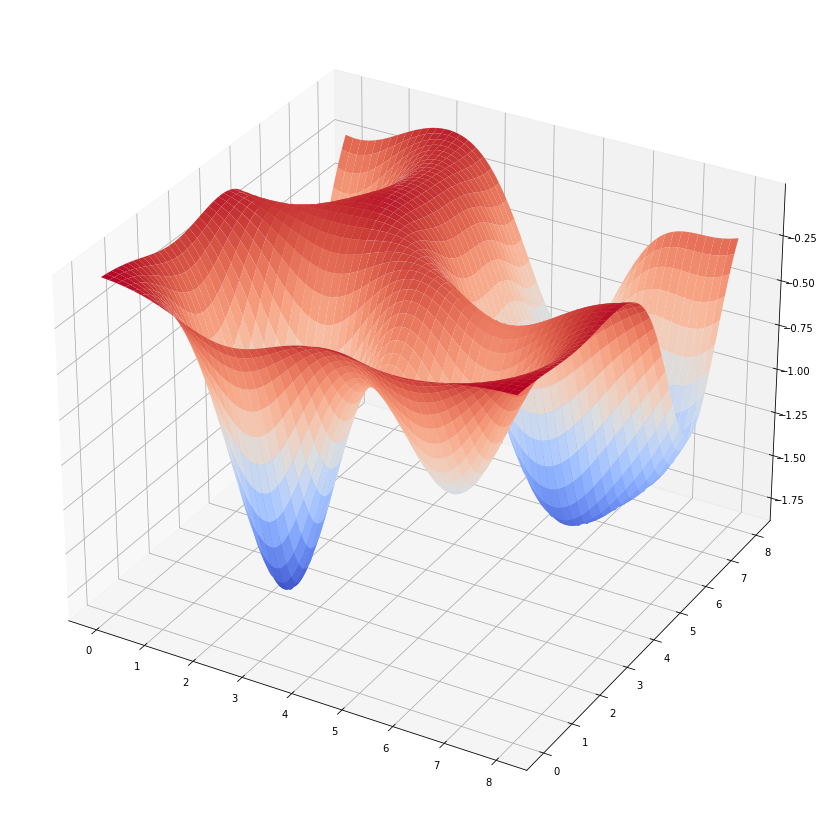

In [486]:
x = np.linspace(0,8, 500)
y = np.linspace(0,8, 500)

X,Y = np.meshgrid(x,y)

Z = Sum_Gauss_Graf(X,Y,sigma)

fig = plt.figure()

fig = plt.figure(figsize =(18, 15))
ax = plt.axes(projection ='3d')

 
# Grafica
ax.plot_surface(X, Y, Z,cmap=cm.coolwarm,
                       linewidth=0)





#### Campo gradiente de la suma de Gaussianas


Como vemos en la gráfica a continuación hay 8 minimos locales para esta Gaussiana sobre $[0,8] \times [0,8]$

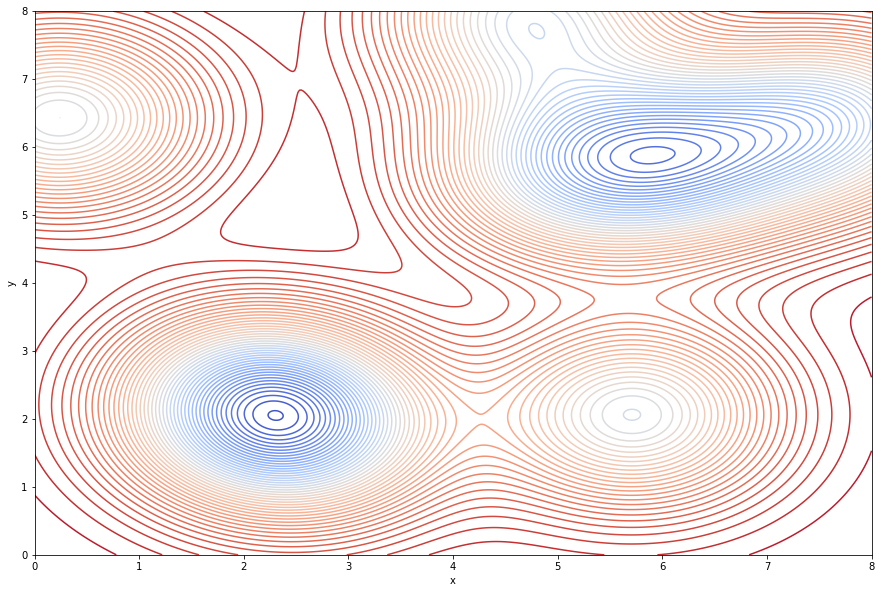

In [487]:
x = np.linspace(0,8, 500)
y = np.linspace(0,8, 500)

X,Y = np.meshgrid(x,y)

Z = Sum_Gauss_Graf(X,Y,sigma)


plt.figure(figsize =(15, 10))
plt.xlabel('x')
plt.ylabel('y')
plt.contour(X,Y,Z, 50, cmap = cm.coolwarm)

Ahora, vamos a aplicar el algoritmo del descenso gradiente con direccion de Newton con Hessiano aproximado via BFGS (Gradiente_BFGS) sobre un total de 64 puntos (todos los de la forma $[i,j]$ donde $i,j$ son algun entero en $[0,8]$), para tratar de obtener las posiciones exactas de cada uno de los 8 minimos esperados. 

In [488]:
#Definimos el gradiente de la suma de Gaussianas

def Grad_Sum_Gauss(x, sigma = sigma):
    
    comp_1 = sum([np.exp(-1/(2*sigma) * np.linalg.norm(x - vector)**2) * ( 1/sigma) * (x[0][0] - vector[0][0]) for vector in vectores_rdm])
    comp_2 = sum([np.exp(-1/(2*sigma) * np.linalg.norm(x - vector)**2) * (1/sigma) * (x[1][0] - vector[1][0]) for vector in vectores_rdm])
    
    return np.array([[comp_1], [comp_2]])

In [489]:
#generamos los vectores/puntos de R2

puntos_init = []

for i in range(0,9):
    for j in range (0,9):
        
        puntos_init.append(np.array([[i], [j]]))

In [491]:
#Parametros de la funcion

f = Sum_Gauss
grad = Grad_Sum_Gauss
alpha= 0.01
max_iter = 100000
tolerancia = 0.00001 
criterio_paro = 'NG'

In [492]:


# Ahora aplicamos el algoritmo de descenso gradiente a cada uno de los puntos iniciales

optimos_encontrados = []
iteraciones_puntos = []
lista_errores = []
No_iters = []
lista_converge = []

for punto in puntos_init:
    
    x, x_iter, f_iter, errores, iters, converge = naive_steepest_descent(f, grad,
                                                                 punto, alpha, max_iter, 
                                                                 tolerancia, criterio_paro)
    
    optimos_encontrados.append(x)
    iteraciones_puntos.append(x_iter)
    lista_errores.append(errores)
    No_iters.append(iters)
    lista_converge.append(converge)




(0.0, 8.0)

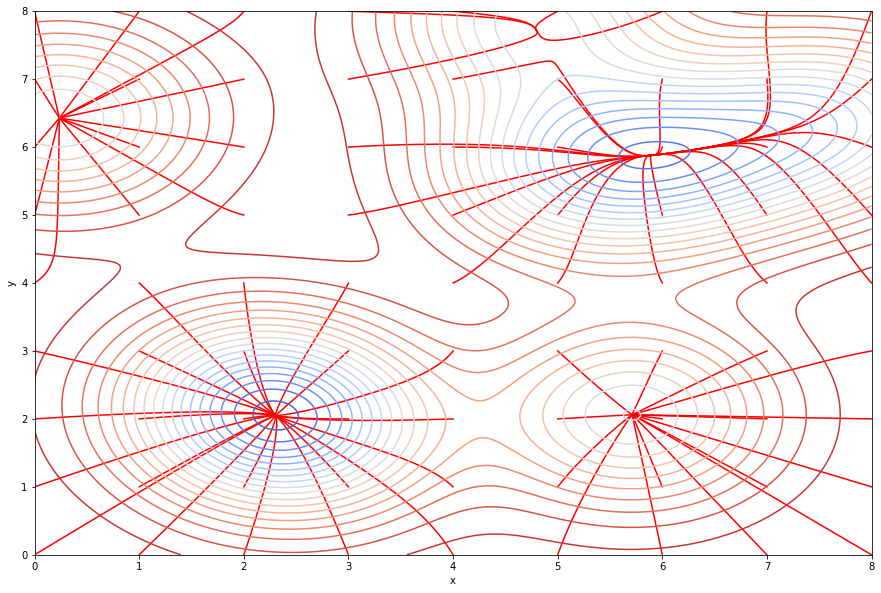

In [494]:
plt.figure(figsize =(15, 10))
plt.xlabel('x')
plt.ylabel('y')

for lista in iteraciones_puntos:
    
    x = [lista[i][0] for i in range(len(lista)) ]
    y = [lista[i][1] for i in range(len(lista)) ]
    
    plt.plot(x,y,  '-r')


plt.contour(X,Y,Z, 20, cmap = cm.coolwarm)

plt.xlim([0, 8])
plt.ylim([0, 8])

Finalmente, para encontrar la ubicacion de los minimos, buscamos todos aquellos puntos en el listado de optimos encontrados, cuyo gradiente satisface $||\nabla f(x^*)|| < \epsilon$

In [509]:
optimos = []

for punto in optimos_encontrados:
    
    if np.linalg.norm(Grad_Sum_Gauss(punto)) < 0.00001:  #Condicioon para ser optimos
        optimos.append(punto)
        
np.unique(np.around(optimos, 2), axis=0)

array([[[0.24],
        [6.43]],

       [[2.3 ],
        [2.05]],

       [[4.8 ],
        [7.72]],

       [[5.71],
        [2.06]],

       [[5.9 ],
        [5.88]]])

Tras filtrar los valores repetidos, obtenemos 5 minimos locales, estos coinciden con las trayectorias de convergencia del metodo del gradiente, que se graficó sobre el campo gradiente correspondiente a la proyección de la suma de Gaussianas sobre $\mathbb{R}^2$. Uno de los optimos encontrados, $(4.8, 7.72)^T$ coincide con la planicie que puede observarse en este lugar, pero no es un minimo local.